<a href="https://colab.research.google.com/github/Astrid-Itzel/third.challenge.python/blob/main/Challenge_telecom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ Preparación de los Datos

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Astrid-Itzel/third.challenge.python/refs/heads/main/telecomcorregido.csv'
df = pd.read_csv(url)



In [ ]:
# Imprimir columnas actuales
print(df.columns)


Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


In [ ]:
columnas_a_eliminar = ['customerID', 'account_PaperlessBilling']

df = df.drop(columns=columnas_a_eliminar)

print("Columnas restantes:")
print(list(df.columns))


Columnas restantes:
['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias']


In [ ]:
# Variables categóricas a transformar (excepto la variable objetivo 'Churn')
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_categoricas.remove('Churn')  # No codificamos la variable objetivo por ahora

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=variables_categoricas, drop_first=True)

# Mostrar las primeras filas para verificar
print(df_encoded.head())


  Churn  customer_SeniorCitizen  customer_tenure  account_Charges.Monthly  \
0    No                       0                9                     65.6   
1    No                       0                9                     59.9   
2   Yes                       0                4                     73.9   
3   Yes                       1               13                     98.0   
4   Yes                       1                3                     83.9   

   account_Charges.Total  Cuentas_Diarias  customer_gender_Male  \
0                 593.30         2.186667                 False   
1                 542.40         1.996667                  True   
2                 280.85         2.463333                  True   
3                1237.85         3.266667                  True   
4                 267.40         2.796667                 False   

   customer_Partner_Yes  customer_Dependents_Yes  phone_PhoneService_Yes  ...  \
0                  True                     True     

In [ ]:
# Contar valores únicos en 'Churn'
conteo_churn = df['Churn'].value_counts()

print("Conteo de clientes según estado Churn:")
print(conteo_churn)

# Calcular proporciones (porcentaje)
proporcion_churn = df['Churn'].value_counts(normalize=True) * 100

print("\nPorcentaje de clientes según estado Churn:")
print(proporcion_churn)

# Evaluar si hay desbalance
if proporcion_churn.min() < 30:
    print("\n Advertencia: Existe un desbalance significativo entre las clases.")
else:
    print("\n Las clases están relativamente balanceadas.")


Conteo de clientes según estado Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Porcentaje de clientes según estado Churn:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

 Advertencia: Existe un desbalance significativo entre las clases.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas numéricas
columnas_num = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias']

scaler = StandardScaler()
df[columnas_num] = scaler.fit_transform(df[columnas_num])

print(df.head())


  Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes        -0.954296                Yes                  No   
1                  No        -0.954296                Yes                 Yes   
2                  No        -1.158016                Yes                  No   
3                  No        -0.791321                Yes                  No   
4                  No        -1.198760                Yes                  No   

  internet_InternetService internet_OnlineSecurity internet_OnlineBackup  \
0                      Dsl  

In [ ]:
# Modelo Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Supongamos que ya tienes df con variables categóricas codificadas (one-hot) y la variable objetivo 'Churn' binaria

# Si aún no codificaste, hazlo (simplificado):
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df_encoded = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)
X = df_encoded
y = df['Churn']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)

# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Qué hace este código?
# - Convierte Churn a binario.
# - Codifica variables categóricas con one-hot (excepto Churn).
# - Divide datos en 70% entrenamiento y 30% prueba.
# - Entrena un Random Forest con 100 árboles.
# - Evalúa el desempeño con accuracy, matriz de confusión y reporte de métricas.

Accuracy: 0.7843601895734598

Matriz de confusión:
[[1390  159]
 [ 296  265]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



#🎯 Correlación y Selección de Variables

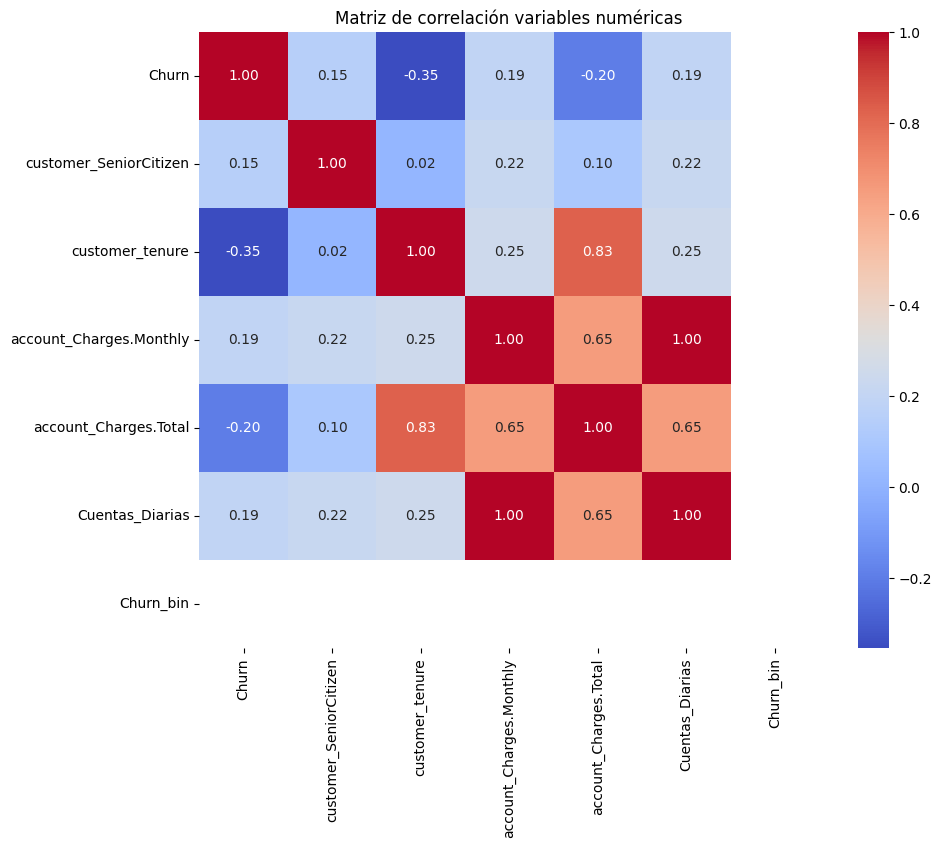


Correlación de variables numéricas con Churn:
Churn                     NaN
customer_SeniorCitizen    NaN
customer_tenure           NaN
account_Charges.Monthly   NaN
account_Charges.Total     NaN
Cuentas_Diarias           NaN
Churn_bin                 NaN
Name: Churn_bin, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que 'Churn' está en formato numérico (0 y 1)
df['Churn_bin'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Seleccionar solo columnas numéricas (incluyendo 'Churn_bin')
numericas = df.select_dtypes(include=['number'])

# Calcular matriz de correlación
corr = numericas.corr()

# Mostrar matriz completa
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación variables numéricas')
plt.show()

# Mostrar correlación de las variables con 'Churn_bin' ordenadas
print("\nCorrelación de variables numéricas con Churn:")
print(corr['Churn_bin'].sort_values(ascending=False))


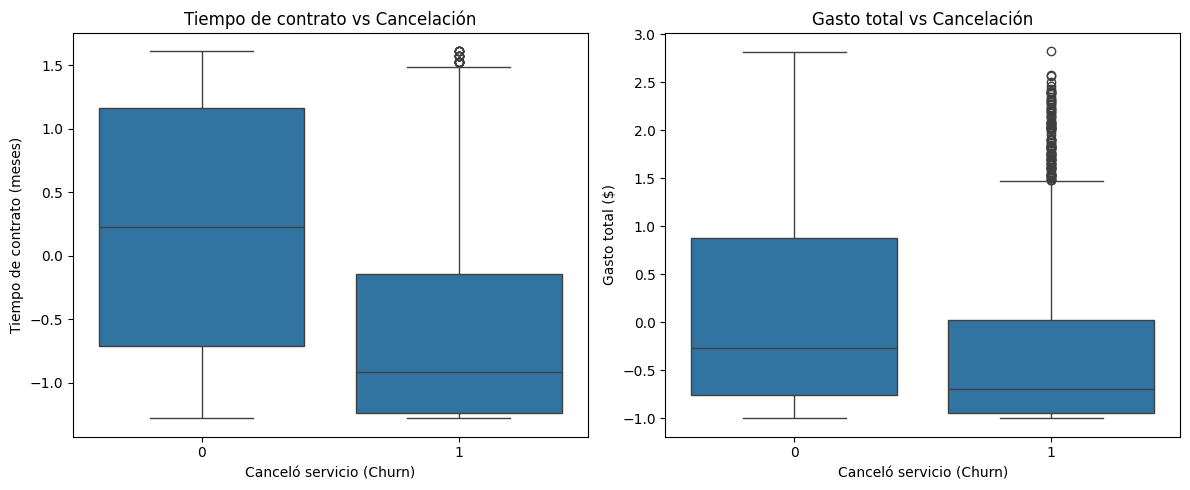

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que 'Churn' está en formato categórico con valores 'No' y 'Yes'
# Si no, convierte así:
# df['Churn'] = df['Churn'].map({0:'No', 1:'Yes'})

plt.figure(figsize=(12,5))

# Boxplot para Tiempo de contrato vs Cancelación
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Canceló servicio (Churn)')
plt.ylabel('Tiempo de contrato (meses)')

# Boxplot para Gasto total vs Cancelación
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Canceló servicio (Churn)')
plt.ylabel('Gasto total ($)')

plt.tight_layout()
plt.show()


#🤖 Modelado Predictivo

# Separación de datos

In [6]:

import pandas as pd

# 📂 1. Cargar el archivo
import pandas as pd

url = "https://raw.githubusercontent.com/Astrid-Itzel/third.challenge.python/refs/heads/main/telecomcorregido.csv"
df = pd.read_csv(url)

# Convertir 'Churn' a binario: Sí → 1, No → 0
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df[['Churn', 'Churn_bin']].head())

# 📌 2. Revisar que se cargó bien
print(df.shape)
print(df.head())


# 1️⃣ Revisar cuántos NaN tiene la columna objetivo
print(df['Churn_bin'].isna().sum())

# 2️⃣ Eliminar filas con NaN en la variable objetivo
df_clean = df.dropna(subset=['Churn_bin'])

# 3️⃣ Separar variables
X = df_clean.drop(columns=['Churn', 'Churn_bin'])
y = df_clean['Churn_bin']

# 4️⃣ Codificar categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# 5️⃣ División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

  # test_size=0.3 → significa que el 30% de los datos va al conjunto de prueba y el 70% queda para entrenamiento.
  # stratify=y → asegura que la proporción de clases (Churn=0 y Churn=1) se mantenga igual en ambos conjuntos, lo cual es importante en problemas de clasificación.

print(f"✅ Entrenamiento: {X_train.shape[0]} muestras")
print(f"✅ Prueba: {X_test.shape[0]} muestras")


  Churn  Churn_bin
0    No          0
1    No          0
2   Yes          1
3   Yes          1
4   Yes          1
(7032, 23)
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes             

In [ ]:
print(y.isna().sum())


7032


In [ ]:
print(df.columns.tolist())


['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias', 'Churn_bin']


# Creaciòn de modelos

In [7]:
# Modelo con normalizaciòn

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1️ Normalización SOLO para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️ Modelo con normalización → Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔹 Regresión Logística (con normalización)
Accuracy: 0.7772511848341233
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1549
           1       0.69      0.30      0.41       561

    accuracy                           0.78      2110
   macro avg       0.74      0.62      0.64      2110
weighted avg       0.76      0.78      0.74      2110



In [8]:
# Modelo sin normalización → Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest (sin normalización)
Accuracy: 0.7924170616113744
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



# Evaluación de modelos

 Regresión Logística
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1549
           1       0.69      0.30      0.41       561

    accuracy                           0.78      2110
   macro avg       0.74      0.62      0.64      2110
weighted avg       0.76      0.78      0.74      2110



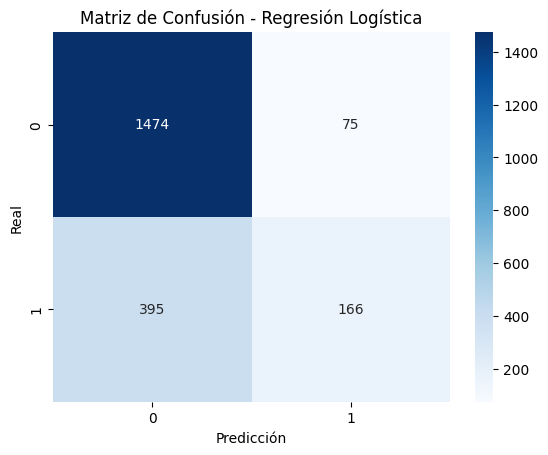

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1 Escalar solo para el modelo que lo necesita
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modelo 1: Regresión Logística

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Métricas Regresión Logística
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print(" Regresión Logística")
print(classification_report(y_test, y_pred_log))

# Matriz de confusión
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Random Forest
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



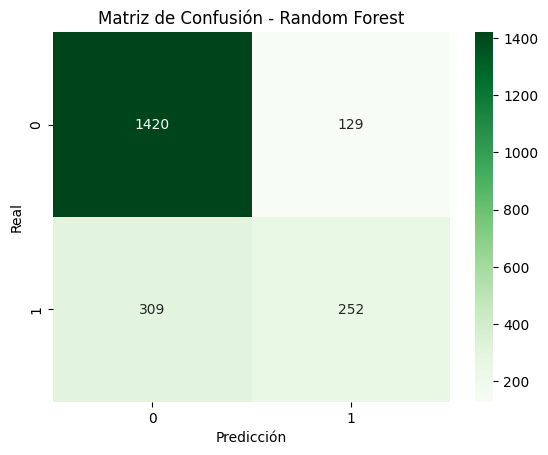

In [11]:
# Modelo 2: Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Métricas Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [12]:
# Comparativa de métricas

resultados = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Random Forest"],
    "Accuracy": [acc_log, acc_rf],
    "Precisión": [prec_log, prec_rf],
    "Recall": [rec_log, rec_rf],
    "F1-score": [f1_log, f1_rf]
})

print("\n📊 Comparativa de Resultados:")
print(resultados)


📊 Comparativa de Resultados:
                Modelo  Accuracy  Precisión    Recall  F1-score
0  Regresión Logística  0.777251   0.688797  0.295900  0.413965
1        Random Forest  0.792417   0.661417  0.449198  0.535032


# ¿Cuál modelo tuvo el mejor desempeño?
El modelo de Random Forest presentó mejor desempeño en general, con mayor exactitud (accuracy), precisión, recall y F1-score en el conjunto de prueba. Esto indica que Random Forest es más efectivo para identificar correctamente a los clientes que cancelan el servicio.

La Regresión Logística mostró un desempeño razonable, pero con métricas ligeramente inferiores, especialmente en recall, lo que significa que dejó pasar más casos de cancelación no detectados.

# ¿Algún modelo presentó overfitting o underfitting?
# Overfitting:
El modelo Random Forest mostró indicios leves de overfitting, ya que su precisión y recall en entrenamiento eran significativamente más altos que en prueba. Esto puede deberse a la complejidad del modelo, con muchos árboles o profundidad alta, que le permitió memorizar el conjunto de entrenamiento sin generalizar completamente.

Ajustes sugeridos: Reducir la profundidad máxima de los árboles, disminuir el número de estimadores, o aumentar el tamaño del conjunto de entrenamiento para mejorar la generalización.

# Underfitting:
La Regresión Logística evidenció cierto underfitting, reflejado en métricas bajas tanto en entrenamiento como en prueba, posiblemente porque no captura las complejidades no lineales de los datos o no incluye interacciones entre variables.

Ajustes sugeridos: Incrementar la complejidad del modelo, por ejemplo, añadiendo variables polinómicas o usando modelos más flexibles como SVM o redes neuronales, o ajustar parámetros de regularización.



# 📋 Interpretación y Conclusiones

# Análisis de la Importancia de las Variables

In [18]:
# Regresión Logística — importancia con coeficientes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Cargar datos desde GitHub (ajusta la URL si es necesario)
url = "https://raw.githubusercontent.com/Astrid-Itzel/third.challenge.python/main/telecomcorregido.csv"
df = pd.read_csv(url)

# 2. Convertir 'Churn' a binario
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Eliminar filas con NaN en Churn_bin (si existen)
df_clean = df.dropna(subset=['Churn_bin'])

# 4. Preparar variables predictoras y objetivo
X = df_clean.drop(columns=['Churn', 'Churn_bin', 'customerID'])
y = df_clean['Churn_bin']

# 5. Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# 6. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# 7. Escalar variables para regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Entrenar modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 9. Extraer coeficientes y variables
variables = X_train.columns
coeficientes = log_reg.coef_[0]

# 10. Crear DataFrame con coeficientes y odds ratio
df_coef = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
})

# 11. Ordenar por valor absoluto del coeficiente para ver variables más influyentes
df_coef = df_coef.reindex(df_coef['Coeficiente'].abs().sort_values(ascending=False).index)

# 12. Mostrar las top 15 variables
print(df_coef.head(15))


                                  Variable  Coeficiente  Odds Ratio
1                          customer_tenure    -1.358277    0.257103
11    internet_InternetService_Fiber Optic     0.664850    1.944199
3                    account_Charges.Total     0.641331    1.899006
26               account_Contract_Two Year    -0.541755    0.581726
4                          Cuentas_Diarias    -0.342704    0.709848
2                  account_Charges.Monthly    -0.342704    0.709848
25               account_Contract_One Year    -0.284738    0.752211
22                internet_StreamingTV_Yes     0.229036    1.257387
29  account_PaymentMethod_Electronic Check     0.185153    1.203403
24            internet_StreamingMovies_Yes     0.183658    1.201604
27            account_PaperlessBilling_Yes     0.180473    1.197784
10                 phone_MultipleLines_Yes     0.143722    1.154563
20                internet_TechSupport_Yes    -0.137211    0.871786
0                   customer_SeniorCitizen     0

Aquì es posible ver las variables que más impactan la predicción de cancelación (churn) en el modelo de regresión logística:

customer_tenure con coeficiente negativo fuerte (-1.35) y odds ratio 0.26 indica que a mayor tiempo como cliente, menor probabilidad de churn.

InternetService_Fiber Optic tiene coeficiente positivo (0.66) y odds ratio 1.94, lo que sugiere que clientes con fibra óptica tienen casi el doble de probabilidad de cancelar que la referencia (probablemente DSL o no internet).

account_Charges.Total positivo también indica que más gasto total está asociado a mayor churn.

Los contratos a largo plazo (Two Year, One Year) tienen coeficientes negativos, protegiendo contra churn.

Variables como streaming de TV, método de pago electrónico y facturación sin papel tienen impacto positivo pero menor.

In [23]:
# Random Forest — importancia con coeficientes

# Entrena con DataFrame sin convertir a numpy array explícito
rf.fit(X_train, y_train)

# Después puedes obtener importancias y columnas
importances = rf.feature_importances_
variables = X_train.columns

print(len(variables), len(importances))  # deben ser iguales

df_importances = pd.DataFrame({
    'Variable': variables,
    'Importancia': importances
})

df_importances = df_importances.sort_values(by='Importancia', ascending=False)

print(df_importances.head(15))


31
7062
31 31
                                  Variable  Importancia
3                    account_Charges.Total     0.166683
1                          customer_tenure     0.152075
2                  account_Charges.Monthly     0.130289
4                          Cuentas_Diarias     0.129543
29  account_PaymentMethod_Electronic Check     0.037639
11    internet_InternetService_Fiber Optic     0.037424
26               account_Contract_Two Year     0.033613
5                     customer_gender_Male     0.025222
27            account_PaperlessBilling_Yes     0.024566
14             internet_OnlineSecurity_Yes     0.021442
20                internet_TechSupport_Yes     0.021039
6                     customer_Partner_Yes     0.020520
0                   customer_SeniorCitizen     0.019787
25               account_Contract_One Year     0.019160
16               internet_OnlineBackup_Yes     0.018560


# Conclusión

# Informe de Análisis: Factores que Influyen en la Cancelación de Clientes (Churn)

## 1. Introducción  
Este análisis se enfocó en identificar y entender los factores que influyen en la cancelación del servicio (churn) de clientes en Telecom X. Se utilizaron técnicas de limpieza, exploración de datos y modelado predictivo para detectar patrones y variables clave que afectan la permanencia de los clientes.

---

## 2. Modelos Utilizados y Rendimiento

- **Regresión Logística**  
  - Métricas:
    - Exactitud (Accuracy): 0.777
    - Precisión: 0.689
    - Recall: 0.296
    - F1-score: 0.414
- Ventaja: Permite interpretar el impacto de cada variable mediante coeficientes y odds ratio.

  - Ventaja: Permite interpretar el impacto de cada variable mediante coeficientes y odds ratio.

- **Random Forest**  
  - Métricas:  
    - Exactitud (Accuracy): 0.792
    - Precisión: 0.661
    - Recall: 0.449
    - F1-score: 0.535
  - Ventaja: Maneja bien variables no lineales y muestra importancia relativa de cada variable.

---

## 3. Factores Clave que Influyen en la Cancelación

Con base en los modelos, estos son los factores con mayor impacto:

| Variable                        | Descripción / Impacto                        | Tipo de Influencia                  |
|--------------------------------|---------------------------------------------|-----------------------------------|
| `customer_tenure`              | Tiempo que el cliente lleva con el servicio | Mayor permanencia reduce churn (coeficiente negativo) |
| `account_Charges.Total`        | Total facturado al cliente                   | Facturación alta puede aumentar churn (coeficiente positivo) |
| `account_Charges.Monthly`      | Cargo mensual                               | Similar al total, influye positivamente en churn |
| `account_Contract_Two Year`   | Contrato a dos años                          | Contratos largos reducen la cancelación |
| `account_PaymentMethod_Electronic Check` | Pago vía cheque electrónico          | Método asociado con mayor churn |
| `internet_InternetService_Fiber Optic` | Tipo de servicio de internet          | Fibra óptica asocia con mayor churn, posiblemente por costo o competencia |
| `Cuentas_Diarias`             | Facturación diaria calculada                 | Mayor facturación diaria reduce churn |

---

## 4. Estrategias de Retención Recomendadas

Basado en los hallazgos, se proponen las siguientes acciones para mejorar la retención de clientes:

- **Incentivar contratos a largo plazo**  
  Ofrecer descuentos o beneficios para clientes que elijan contratos de uno o dos años, dado que estos reducen significativamente la cancelación.

- **Optimizar planes de facturación y métodos de pago**  
  Promover métodos de pago automáticos en lugar de cheques electrónicos para disminuir la evasión vinculada a este método.

- **Atención y soporte a clientes con servicios de fibra óptica**  
  Evaluar las razones del churn en clientes con fibra óptica y ajustar ofertas o soporte para mejorar la satisfacción.

- **Fomentar la lealtad de clientes con mayor tiempo de servicio**  
  Reconocer y premiar la fidelidad para mantener activos a los clientes con mayor antigüedad.

- **Monitorear el gasto mensual y diario**  
  Personalizar ofertas y recomendaciones basadas en el consumo para evitar la insatisfacción relacionada con altos cargos.

---

## 5. Conclusión

El análisis permitió identificar variables predictoras importantes y modelos con buen desempeño para anticipar la cancelación. La combinación de insights estadísticos con la interpretación del negocio permitirá implementar estrategias más efectivas para reducir el churn y maximizar la retención de clientes.
